# Prediction of a woman of having an affair

##### Dataset

The dataset I chose is the affairs dataset that comes with Statsmodels. It was derived
from a survey of women in 1974 by Redbook magazine, in which married women were
asked about their participation in extramarital affairs. More information about the study
is available in a 1978 paper from the Journal of Political Economy.

##### Description of Variables

The dataset contains 6366 observations of 9 variables:

rate_marriage: woman's rating of her marriage (1 = very poor, 5 = very good)

age: woman's age

yrs_married: number of years married

children: number of children

religious: woman's rating of how religious she is (1 = not religious, 4 = strongly religious)

educ: level of education (9 = grade school, 12 = high school, 14 = some college, 16 =college graduate, 17 = some graduate school, 20 = advanced degree)

occupation: woman's occupation (1 = student, 2 = farming/semi-skilled/unskilled, 3 ="white collar", 4 = teacher/nurse/writer/technician/skilled, 5 = managerial/business, 6 =professional with advanced degree)

occupation_husb: husband's occupation (same coding as above)

affairs: time spent in extra-marital affairs

In [1]:
# Import necessary libery
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
affair_dta = sm.datasets.fair.load_pandas().data

In [3]:
affair_dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [4]:
#add an binary afair column. 0= no afair, 1= afair
affair_dta['affair']=(affair_dta['affairs']>0).astype(int)
affair_dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


### Data exploration

In [5]:
affair_dta.groupby('affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


In [6]:
#lets another look at the rate of marriage variable
affair_dta.groupby('rate_marriage').mean()

,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
rate_marriage,,,,,,,,,
1.0,33.823232,13.914141,2.308081,2.343434,13.848485,3.232323,3.838384,1.201671,0.747475
2.0,30.471264,10.727011,1.735632,2.330460,13.864943,3.327586,3.764368,1.615745,0.635057
3.0,30.008056,10.239174,1.638469,2.308157,14.001007,3.402820,3.798590,1.371281,0.550856
4.0,28.856601,8.816905,1.369536,2.400981,14.144514,3.420161,3.835861,0.674837,0.322926
5.0,28.574702,8.311662,1.252794,2.506334,14.399776,3.454918,3.892697,0.348174,0.181446


An increase in age, yrs_married, and children appears to correlate with increase in affairs.
A decrease in education to correlate with increase in affairs.

In [7]:
affair_dta.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374,0.322495
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374,0.467468
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848,1.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991,1.000000


### Data Visualization

Text(0,0.5,'Frequency')

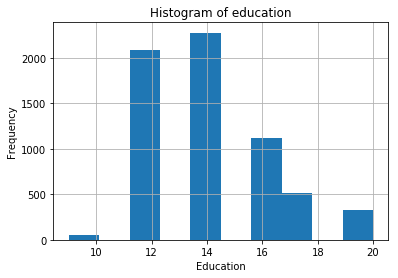

In [8]:
%matplotlib inline
affair_dta['educ'].hist()
plt.title("Histogram of education")
plt.xlabel("Education")
plt.ylabel("Frequency")

Text(0,0.5,'Frequency')

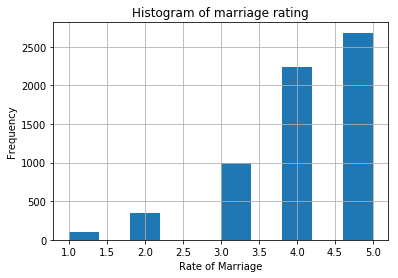

In [9]:
# Histogram of marriage rating
affair_dta['rate_marriage'].hist()
plt.title("Histogram of marriage rating")
plt.xlabel("Rate of Marriage")
plt.ylabel("Frequency")

#### Let's take a look at the distribution of marriage ratings for those having affairs versus those not having affairs.

Text(0,0.5,'Frequency')

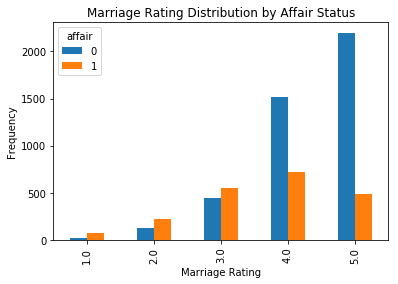

In [10]:
# barplot of marriage rating grouped by affair (True or False)
pd.crosstab(affair_dta['rate_marriage'], affair_dta['affair']).plot(kind='bar')
plt.title('Marriage Rating Distribution by Affair Status')
plt.xlabel('Marriage Rating')
plt.ylabel('Frequency')

Let's use a stacked barplot to look at the percentage of women having affairs by number of years of marriage.

In [11]:
affair_yrs_married=pd.crosstab(affair_dta['yrs_married'],affair_dta['affair'])

Text(0,0.5,'Percentage')

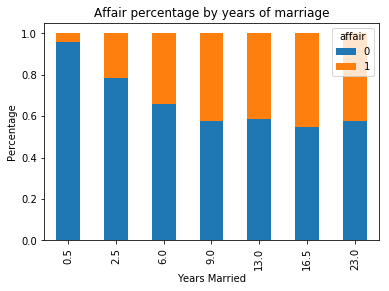

In [12]:
affair_yrs_married.div(affair_yrs_married.sum(1),axis=0).plot(kind='bar',stacked=True)
plt.title('Affair percentage by years of marriage')
plt.xlabel("Years Married")
plt.ylabel('Percentage')

#### Prepare data for logistics Regression

To prepare the data, adding an intercept column as well as dummy variables for occupation and occupation_husb, since we are treating them as categorial variables. 
The dmatrices function from the patsy module can do that using formula language.


In [13]:
#intercept column = affair,dummy variables for occupation and occupation_husb
y,X=dmatrices('affair~rate_marriage+age+yrs_married+children+religious+educ+C(occupation)+C(occupation_husb)',affair_dta,return_type='dataframe')

In [14]:
X.columns

Index(['Intercept', 'C(occupation)[T.2.0]', 'C(occupation)[T.3.0]',
       'C(occupation)[T.4.0]', 'C(occupation)[T.5.0]', 'C(occupation)[T.6.0]',
       'C(occupation_husb)[T.2.0]', 'C(occupation_husb)[T.3.0]',
       'C(occupation_husb)[T.4.0]', 'C(occupation_husb)[T.5.0]',
       'C(occupation_husb)[T.6.0]', 'rate_marriage', 'age', 'yrs_married',
       'children', 'religious', 'educ'],
      dtype='object')

In [15]:
# rename ugly columns to make it more understandable
X.rename(columns={'C(occupation)[T.2.0]':'occu_2',
          'C(occupation)[T.3.0]':'occu_3',
          'C(occupation)[T.4.0]':'occu_4', 
          'C(occupation)[T.5.0]':'occu_5',
          'C(occupation)[T.6.0]':'occu_6',
          'C(occupation_husb)[T.2.0]':'occu_h_2',
          'C(occupation_husb)[T.3.0]':'occu_h_3',
          'C(occupation_husb)[T.4.0]':'occu_h_4', 
          'C(occupation_husb)[T.5.0]':'occu_h_5',
          'C(occupation_husb)[T.6.0]':'occu_h_6'},inplace=True)

We also need to flatten y into a 1-D array, so that scikit-learn will properly understand it as the response variable.

In [16]:
y=np.ravel(y)
y

array([1., 1., 1., ..., 0., 0., 0.])

### Model Evaluation

Preparing training and test split

In [17]:
from sklearn.model_selection import train_test_split
# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4456, 17)
(4456,)
(1910, 17)
(1910,)


Fit training data set to Logistics Regression

In [18]:
lr=LogisticRegression()
lr_model=lr.fit(X_train,y_train)

Caluculate model accuracy based on the traing data

In [19]:
lr_model.score(X_train,y_train)

0.723967684021544

### So, it has 73% accuracy on trainging data 

Use the test data set to predict the class / labels

In [20]:
predicted=lr_model.predict(X_test)
predicted

array([1., 0., 0., ..., 0., 0., 0.])

Determine accuracy score

In [21]:
# generate evaluation metrics
print(metrics.accuracy_score(y_test,predicted))

0.7298429319371728


## So the test data also has a accuracy of 73%

## Prediction of a random woman who was not present in dataset

let's predict the probability of an affair for a random woman not present in the dataset. She's a 27-year-old teacher who graduated college, has been married for 3 years, has 1 child, rates herself as strongly religious, rates her marriage as fair, and her husband is a farmer

In [22]:
lr_model.predict_proba(np.array([[1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 3, 27, 3, 1, 4,16]]))

array([[0.7913386, 0.2086614]])

The predicted probability ofthe selected woman of having an affair is 23%.